## 🏫Model Training 

**1.1 Import Data and REquired Packages**

In [7]:
# Importing all modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from catboost import CatBoostRegressor
import warnings

In [9]:
# Import dataset
df = pd.read_csv("data/stud.csv")

In [10]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# Prepare X and y
X = df.drop("math_score", axis=1)
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race_ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [13]:
y = df["math_score"]

In [14]:
y

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [15]:
# Create column transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer([
    ("oneHot", categorical_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
])

In [16]:
X = preprocessor.fit_transform(X)

In [17]:
X.shape

(1000, 19)

In [19]:
from sklearn.model_selection import train_test_split
X_train ,X_test, y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 19), (200, 19), (800,), (200,))

In [20]:
# Create an Evaluation function to give all metrics after model training

def evaluate_model(true, predicted): 
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasoo Regression": Lasso(),
    "Ridge Regression": Ridge(),
    "KNN": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "CatBoost": CatBoostRegressor(verbose=False),
    "AdaBoost": AdaBoostRegressor(),
}

model_list = []
r2_list = []

for name, model in models.items(): 
    model.fit(X_train, y_train)

    # make predictions
    y_train_preds = model.predict(X_train)
    y_test_preds = model.predict(X_test)

    # evaluate train and test dataset
    model_train_mae, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_preds)
    model_test_mae, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_preds)

    print(name + ":")
    model_list.append(name)

    print("Model performance on training dataset:")
    print(f"MAE: {model_train_mae}")
    print(f"RMSE: {model_train_rmse}")
    print(f"R2 Square: {model_train_r2}")
    print("_"*40)
    print("Model performance on test dataset:")
    print(f"MAE: {model_test_mae}")
    print(f"RMSE: {model_test_rmse}")
    print(f"R2 Square: {model_test_r2}")
    r2_list.append(model_test_r2)

    print("+------------------------------------+")
    print("\n")

Linear Regression:
Model performance on training dataset:
MAE: 4.267109375
RMSE: 5.32433481852575
R2 Square: 0.8742565651513869
________________________________________
Model performance on test dataset:
MAE: 4.2158203125
RMSE: 5.3959872842671395
R2 Square: 0.8803449074540941
+------------------------------------+


Lasoo Regression:
Model performance on training dataset:
MAE: 5.206302661246526
RMSE: 6.593815587795566
R2 Square: 0.8071462015863456
________________________________________
Model performance on test dataset:
MAE: 5.157881810347763
RMSE: 6.519694535667419
R2 Square: 0.8253197323627853
+------------------------------------+


Ridge Regression:
Model performance on training dataset:
MAE: 4.264987823725981
RMSE: 5.323324922741654
R2 Square: 0.8743042615212909
________________________________________
Model performance on test dataset:
MAE: 4.2111006880142625
RMSE: 5.390387016935642
R2 Square: 0.8805931485028737
+------------------------------------+


KNN:
Model performance on

In [25]:
# result 
pd.DataFrame(list(zip(model_list, r2_list)), columns=["Model", "R2 Score"]).sort_values("R2 Score", ascending=False)

,Model,R2 Score
2,Ridge Regression,0.880593
0,Linear Regression,0.880345
6,CatBoost,0.851632
5,Random Forest,0.849410
7,AdaBoost,0.846560
1,Lasoo Regression,0.825320
3,KNN,0.783813
4,Decision Tree,0.743259


#### Linear Regression:

In [30]:
linear_regression = LinearRegression(fit_intercept=True)
linear_regression = linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)
score = linear_regression.score(X_test, y_test)* 100
print("Accuracy: %.2f"%score)

Accuracy: 88.03


**Plot `y_pred` and `y_test`**

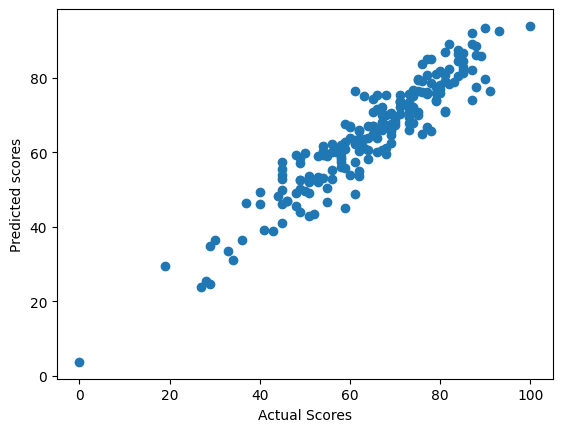

In [32]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted scores");

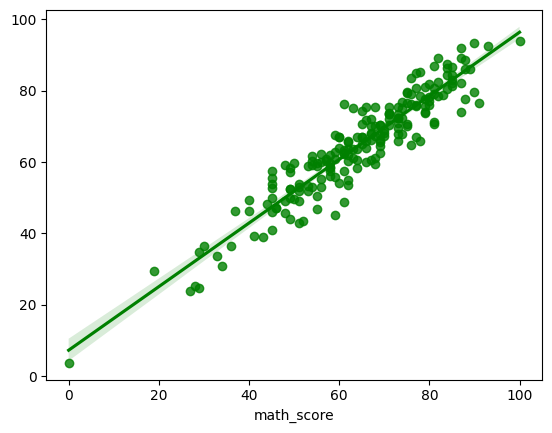

In [35]:
sns.regplot(x = y_test, y = y_pred, color="g");

In [38]:
# Difference between predicted and actual labels

pred_df = pd.DataFrame({"Actual Labels": y_test, "Predicted Labels": y_pred})
pred_df["differences"] = pred_df["Actual Labels"] - pred_df["Predicted Labels"]
pred_df

,Actual Labels,Predicted Labels,differences
521,91,76.507812,14.492188
737,53,58.953125,-5.953125
740,80,76.960938,3.039062
660,74,76.757812,-2.757812
411,84,87.539062,-3.539062
...,...,...,...
408,52,43.546875,8.453125
332,62,62.031250,-0.031250
208,74,67.976562,6.023438
613,65,67.132812,-2.132812
